---

### Project 2: Regional Geographic Analysis of Medication Expenditure

#### Project Overview
This project maps generic drug adoption across French regions to identify geographic health inequalities 
and pinpoint territories where brand-name expenditure remains disproportionately high.

#### Key Objectives:
1. *Calculate the Generic Penetration Rate:* Determine the ratio of generic vs. brand-name drug consumption for each French region.
2. *Identify Spending Hotspots:* Pinpoint regions with high brand-name reliance to suggest targeted public health interventions.
3. *Geospatial Visualization:* Create a regional choropleth map to communicate data-driven insights effectively.

---

In [1]:
import pandas as pd
file_path = 'open_medic_2024.csv'

df = pd.read_csv(file_path, sep=';', nrows=1000, encoding='latin1')

df.head()

,ATC1,l_ATC1,ATC2,L_ATC2,ATC3,L_ATC3,ATC4,L_ATC4,ATC5,L_ATC5,...,l_cip13,TOP_GEN,GEN_NUM,age,sexe,BEN_REG,PSP_SPE,BOITES,REM,BSE
0,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,FLUOGEL GEL DENTAIRE 1,0,0,99,9,99,99,14,"38,54","51,38"
1,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,1,25,"13,06","41,45"
2,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,99,20,"10,18","33,92"
3,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,1,114,"48,89","147,48"
4,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,12,404,"157,83","521,16"


In [2]:
print(df.columns.tolist())

['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4', 'ATC5', 'L_ATC5', 'CIP13', 'l_cip13', 'TOP_GEN', 'GEN_NUM', 'age', 'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE']


In [3]:
import pandas as pd

# Load the data 
# Using 'sep=;' 
# Using 'decimal=,' so Python knows 38,54 is actually 38.54
df = pd.read_csv('OPEN_MEDIC_2024.csv', 
                 sep=';', 
                 decimal=',', 
                 encoding='latin1')
# Run this immediately after loading your CSV
df.columns = df.columns.str.upper()

# Select relevant col
cols_to_keep = [
    'TOP_GEN',  # Generic drug flag: 0 = Princeps (Brand), 1 = Generic, 2 = Generic-like
    'BEN_REG',   #Region of cinsumption
    'BOITES'  # Quantity: Total number of boxes of medication dispensed    
]
df = df[cols_to_keep]
df = df[df['TOP_GEN'].isin([0, 1])]

# results
print("cleaned data")
print(df.head())



cleaned data
   TOP_GEN  BEN_REG  BOITES
0        0       99      14
1        0        5      25
2        0        5      20
3        0       11     114
4        0       11     404


In [5]:
# Official INSEE Mapping for French Regions 
reg_map = {
    11: "Île-de-France",
    24: "Centre-Val de Loire",
    27: "Bourgogne-Franche-Comté",
    28: "Normandie",
    32: "Hauts-de-France",
    44: "Grand Est",
    52: "Pays de la Loire",
    53: "Bretagne",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    84: "Auvergne-Rhône-Alpes",
    93: "Provence-Alpes-Côte d'Azur",
    94: "Corse",
    # Overseas Regions (DOMTOM)
    1: "Guadeloupe",
    2: "Martinique",
    3: "Guyane",
    4: "La Réunion",
    6: "Mayotte"
}

# Group by Region and TOP_GEN (0=Brand, 1=Generic)
# We aggregate the volume of boxes to see adoption per territory
regional_df = df.groupby(['BEN_REG', 'TOP_GEN'])['BOITES'].sum().unstack().reset_index()

# 3. Calculate the Adoption Rate (%)
regional_df['Total_Boxes'] = regional_df[0] + regional_df[1]
regional_df['Adoption_Rate'] = (regional_df[1] / regional_df['Total_Boxes']) * 100

# map the Region Names
regional_df['Region_Name'] = regional_df['BEN_REG'].map(reg_map)

# filter for Metro France (Regions 11-94) for the ranking
regional_metro = regional_df[regional_df['BEN_REG'] >= 11].sort_values(by='Adoption_Rate', ascending=False)

print("--- Regional Generic Adoption Rankings ---")
print(regional_metro[['Region_Name', 'Adoption_Rate']])

--- Regional Generic Adoption Rankings ---
TOP_GEN                 Region_Name  Adoption_Rate
8                          Bretagne      50.658031
2               Centre-Val de Loire      50.093364
9                Nouvelle-Aquitaine      49.923279
10                        Occitanie      49.848899
3           Bourgogne-Franche-Comté      49.721880
4                         Normandie      49.562190
12       Provence-Alpes-Côte d'Azur      49.404578
11             Auvergne-Rhône-Alpes      49.359037
7                  Pays de la Loire      49.179442
5                   Hauts-de-France      48.836385
1                     Île-de-France      48.768465
6                         Grand Est      48.355160
13                              NaN      43.514562


C:\Users\arshb\AppData\Local\Temp\ipykernel_21936\2591093545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


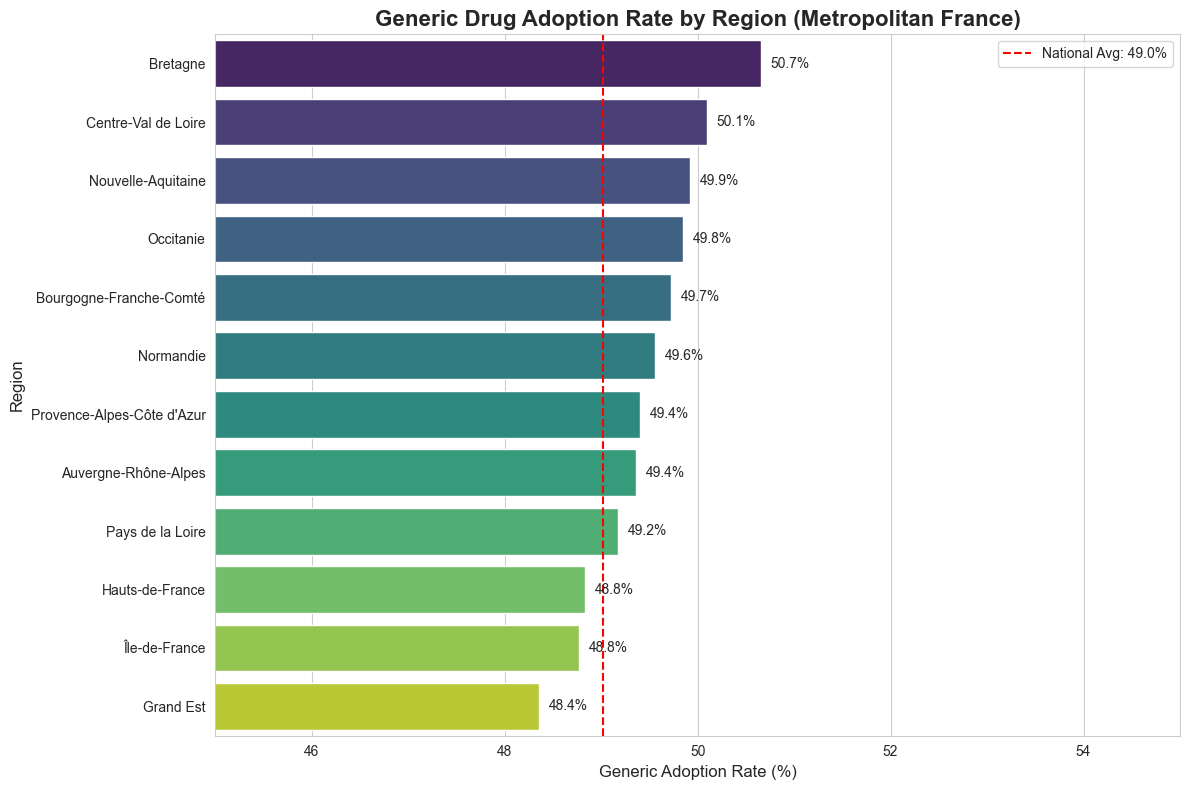

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create the figure
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 2. Plot the data
# We use 'magma' or 'viridis' to highlight the ranking
ax = sns.barplot(
    x='Adoption_Rate', 
    y='Region_Name', 
    data=regional_metro, 
    palette='viridis'
)

# 3. Add a "National Average" vertical line
avg_rate = regional_metro['Adoption_Rate'].mean()
plt.axvline(avg_rate, color='red', linestyle='--', label=f'National Avg: {avg_rate:.1f}%')

# 4. Formatting
plt.title('Generic Drug Adoption Rate by Region (Metropolitan France)', fontsize=16, fontweight='bold')
plt.xlabel('Generic Adoption Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xlim(45, 55) # Zooming in on the 45%-55% range to see the differences clearly
plt.legend()

# Add labels on the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.savefig('regional_adoption_ranking.png')
plt.show()

### 🔍 Analysis: Regional Homogeneity
The data reveals a surprisingly tight cluster of adoption rates, ranging from **48.4% (Grand Est)** to **50.7% (Bretagne)**. 

**Key Takeaways:**
* **Consistency:** The low variance (approx. 2.3%) suggests that national pharmaceutical policies are being implemented with high consistency across mainland France.
* **The "2% Lever":** While the gap appears small, in a multi-billion euro market, moving a region like *Île-de-France* (Paris) up by 2% to match *Bretagne* would result in millions of euros in public savings.
* **Next Steps:** We will now project these values onto a map to see if there are geographic clusters (e.g., North vs. South).

In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import folium
import pandas as pd
import json
import requests

# 1. data (based on your rankings)
data = {
    'Region_Name': [
        'Bretagne', 'Centre-Val de Loire', 'Nouvelle-Aquitaine', 'Occitanie', 
        'Bourgogne-Franche-Comté', 'Normandie', "Provence-Alpes-Côte d'Azur", 
        'Auvergne-Rhône-Alpes', 'Pays de la Loire', 'Hauts-de-France', 
        'Île-de-France', 'Grand Est'
    ],
    'Adoption_Rate': [
        50.65, 50.09, 49.92, 49.84, 49.72, 49.56, 
        49.40, 49.35, 49.17, 48.83, 48.76, 48.35
    ]
}
df_map = pd.DataFrame(data)

# 2. Fetch the GeoJSON for French Regions
geojson_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# 3. Initialize the map centered on France
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6, tiles="cartodbpositron")

# 4. Create the Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=df_map,
    columns=["Region_Name", "Adoption_Rate"],
    key_on="feature.properties.nom", # This matches the name in the GeoJSON
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Generic Adoption Rate (%)",
).add_to(m)

# 5. Save as HTML
m.save("Generic_Adoption_Map.html")
print("Map has been saved as 'Generic_Adoption_Map.html'. Open this file in your browser!")

Map has been saved as 'Generic_Adoption_Map.html'. Open this file in your browser!


In [9]:
#first, hanle nan by naming corsia
df_map['Region_Name'] = df_map['Region_Name'].fillna('Corse')

#create the base map as before
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6, tiles="cartodbpositron")

#use GeoJson for better control over tooltips
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=df_map,
    columns=["Region_Name", "Adoption_Rate"],
    key_on="feature.properties.nom",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Generic Adoption Rate (%)",
    highlight=True 
).add_to(m)

# 4.Tooltip
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['nom'],
        aliases=['Region: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

m.save("Interactive_Generic_Map.html")